 # Nettoyage des données Projet Immo

Import des librairies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


## Import des données

In [3]:
immo_df = pd.read_csv("immo.csv", delimiter=",")

In [4]:
immo_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


Explication des differentes colonnes: 
1.	**longitude**
2.	**latitude**
3.	**housingMedianAge**: Âge médian d'une maison dans un pâté de maisons ; un chiffre plus bas correspond à un bâtiment plus récent.
4.	**totalRooms**: Nombre total de chambres dans un bloc
5.	**totalBedrooms**: Nombre total de chambres dans un bloc
6.	**population**: Nombre total de personnes résidant dans un bloc
7.	**households**: Nombre total de ménages, c'est-à-dire un groupe de personnes résidant dans une unité d'habitation, pour un bloc
8.	**medianIncome**: Revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars US)
9.	**medianHouseValue**: Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars US)
10.	**oceanProximity**: Situation de la maison par rapport à la mer


## Exploration des données 

### Observation des données

In [5]:
immo_df.shape

(16512, 11)

In [6]:
immo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


### La colonne Unnamed

In [7]:
immo_df.duplicated(['Unnamed: 0']).value_counts()

False    16512
dtype: int64

La colonne Unnamed: 0 ne contient que des valeurs unique, cette colonne doit correspondre à l'index

In [8]:
immo_df.set_index(['Unnamed: 0'], inplace = True)
immo_df.index.names = [None]
immo_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


### Données dupliqué 

In [51]:
duplicate = immo_df[immo_df.duplicated(subset=['longitude','latitude'])]
duplicate.sort_values(by= ['longitude'], ascending= False)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,localisation
2700,-115.37,32.81,32.0,741.0,191.0,623.0,169.0,1.7604,68600.0,INLAND,1
2696,-115.37,32.82,14.0,1276.0,270.0,867.0,261.0,1.9375,80900.0,INLAND,1
2677,-115.52,32.98,32.0,1615.0,382.0,1307.0,345.0,1.4583,58600.0,INLAND,1
2690,-115.52,32.97,24.0,1617.0,366.0,1416.0,401.0,1.9750,66400.0,INLAND,1
2686,-115.53,32.97,35.0,1583.0,340.0,933.0,318.0,2.4063,70700.0,INLAND,1
...,...,...,...,...,...,...,...,...,...,...,...
2544,-124.16,40.78,50.0,2285.0,403.0,837.0,353.0,2.5417,85400.0,NEAR OCEAN,2
2542,-124.17,40.80,52.0,1557.0,344.0,758.0,319.0,1.8529,62500.0,NEAR OCEAN,2
2541,-124.17,40.80,52.0,1606.0,419.0,891.0,367.0,1.5850,75500.0,NEAR OCEAN,2
2548,-124.18,40.79,40.0,1398.0,311.0,788.0,279.0,1.4668,64600.0,NEAR OCEAN,2


In [106]:
visu_test= duplicate.loc[duplicate.longitude == -124.16]
visu_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,localisation
2566,-124.16,40.78,46.0,1975.0,346.0,791.0,349.0,3.8000,81800.0,NEAR OCEAN,2
2544,-124.16,40.78,50.0,2285.0,403.0,837.0,353.0,2.5417,85400.0,NEAR OCEAN,2
2539,-124.16,40.80,52.0,2416.0,618.0,1150.0,571.0,1.7308,80500.0,NEAR OCEAN,2


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

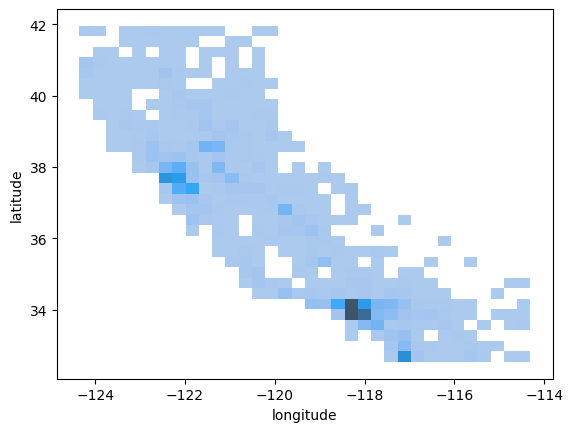

In [42]:
sns.histplot(x=immo_df["longitude"], y=immo_df['latitude'] )

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

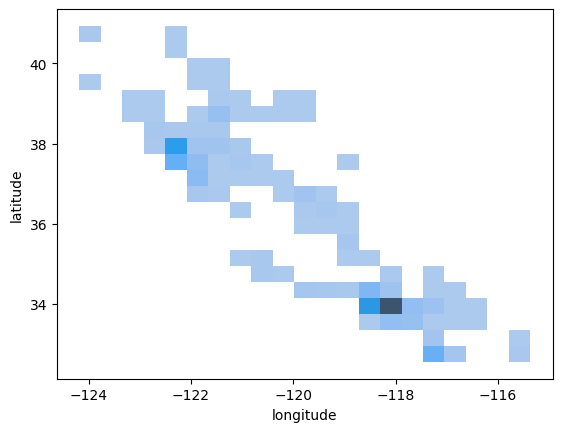

In [43]:
sns.histplot(x=duplicate["longitude"], y=duplicate['latitude'])

In [48]:
duplicates = duplicate.groupby(['longitude'])['latitude'].count()
duplicates.to_frame()
duplicates.reset_index()

,longitude,latitude
0,-124.18,2
1,-124.17,2
2,-124.16,3
3,-124.15,1
4,-124.14,1
...,...,...
457,-115.55,1
458,-115.54,2
459,-115.53,1
460,-115.52,2


<AxesSubplot:xlabel='longitude', ylabel='Count'>

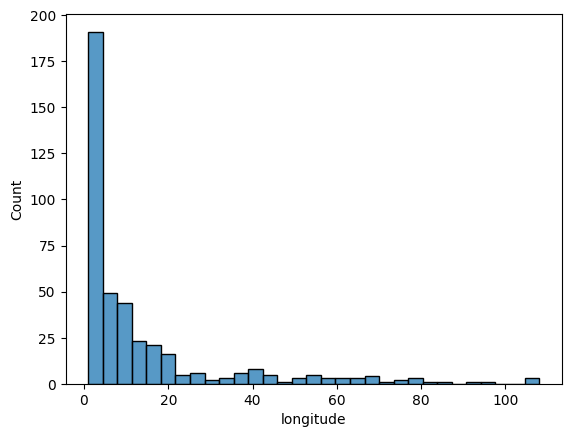

In [14]:
sns.histplot(duplicates)

Une fois que les dupliqué on bien été identifier, deux choix :
- voir sur la map s'il sont des 'vrais' duplicats : lequel choisir, faire une moyenne des autres donnes
-  les conservé car ce ne sont pas des duplicats

faire une fonction pour trouver les vrai duplicat 

###  transformation de la colonne ocean_proximity

In [17]:
immo_df.ocean_proximity.value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [30]:
immo_df['localisation'] = immo_df.ocean_proximity.apply(lambda x: 
                                            0 if x== '<1H OCEAN'
                                            else 1 if x == 'INLAND'
                                            else 2 if x == 'NEAR OCEAN'
                                            else 3 if x == 'NEAR BAY'
                                            else 4 )
immo_df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,localisation
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,1
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,0
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,1
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,0
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,1
...,...,...,...,...,...,...,...,...,...,...,...
1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,1
18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,3
11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,1
6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,0


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

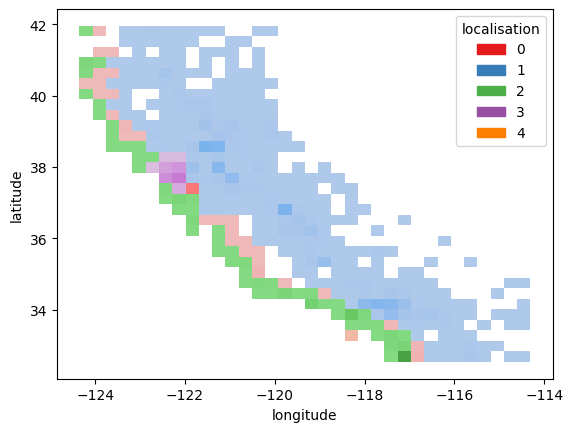

In [35]:
sns.histplot(x=immo_df["longitude"], y=immo_df['latitude'], hue= immo_df['localisation'], palette = 'Set1' )

### Données manquante : Total Bedrooms

In [58]:
immo_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
localisation            0
dtype: int64

In [14]:
immo_df['total_bedrooms'].isnull().value_counts()

False    16336
True       176
Name: total_bedrooms, dtype: int64

Une des colonnes ( total_bedrooms) contient des valeurs null (176 sur 16512).

In [16]:
null = immo_df.loc[immo_df['total_bedrooms'].isnull()]
null

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5723,-118.23,34.18,45.0,2332.0,NaN,943.0,339.0,8.1132,446600.0,<1H OCEAN
2578,-124.06,40.86,34.0,4183.0,NaN,1891.0,669.0,3.2216,98100.0,NEAR OCEAN
10033,-121.08,39.22,30.0,2188.0,NaN,1033.0,437.0,2.1419,105200.0,INLAND
19485,-120.98,37.66,10.0,934.0,NaN,401.0,255.0,0.9336,127100.0,INLAND
19766,-122.10,40.03,25.0,2516.0,NaN,1266.0,494.0,1.7566,58400.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
17202,-119.73,34.44,38.0,1729.0,NaN,801.0,395.0,3.1364,357500.0,NEAR OCEAN
17041,-122.28,37.51,33.0,4719.0,NaN,1980.0,757.0,6.1064,405000.0,NEAR OCEAN
4591,-118.28,34.06,42.0,2472.0,NaN,3795.0,1179.0,1.2254,162500.0,<1H OCEAN
9942,-122.23,38.17,45.0,350.0,NaN,225.0,72.0,1.8942,216700.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

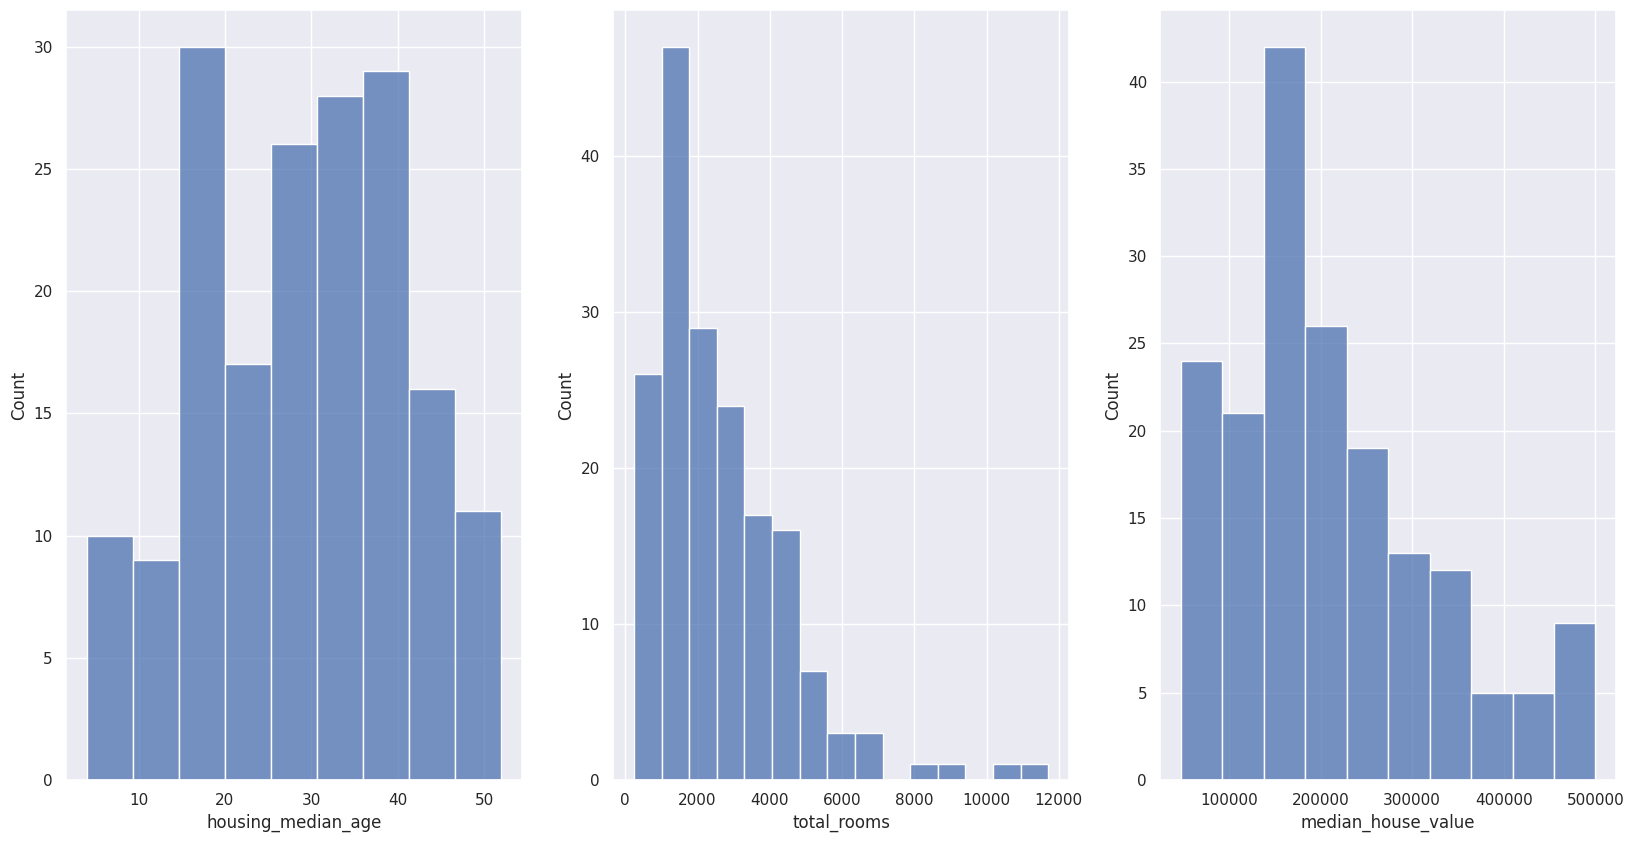

In [35]:
sns.set(rc={"figure.figsize":(20,10)},style='darkgrid')
fig, ax =plt.subplots(1,3)
sns.histplot(x=null["housing_median_age"], ax=ax[0])
sns.histplot(x=null["total_rooms"], ax=ax[1])
sns.histplot(x=null["median_house_value"], ax=ax[2])


Imputation ? suppression ? Realisation d'une veille pour choisir quel technique me semble le plus addapté a la situation. Données qui seront potentiellement reprise lors de la prochaine iteration de nettoyage si le choix ne conviens pas 

### differents test d' imputations

https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87

#### Mean and Mode Imputation

In [56]:
import numpy as np
from sklearn.impute import SimpleImputer
df_test = immo_df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df_test['total_bedrooms'] = mean_imputer.fit_transform(df_test['total_bedrooms'].values.reshape(-1,1))
df_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,localisation
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,1
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,0
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,1
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,0
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,1
...,...,...,...,...,...,...,...,...,...,...,...
1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,1
18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,3
11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,1
6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,0


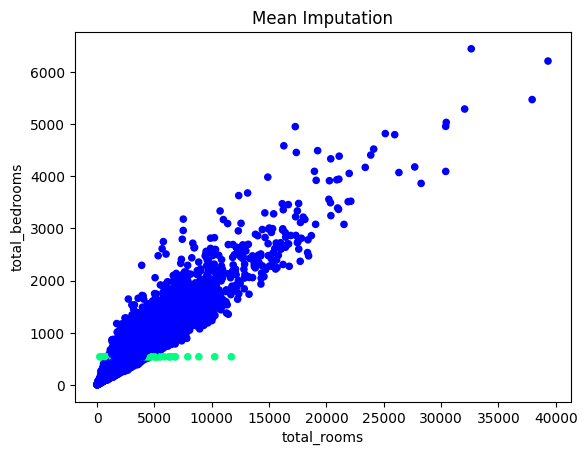

In [62]:
fig = plt.Figure()
null_values = immo_df['total_bedrooms'].isnull()
fig = df_test.plot(x="total_rooms", y='total_bedrooms', kind='scatter', c=null_values, cmap='winter', title='Mean Imputation', colorbar=False)

In [63]:
df_test2 = immo_df.copy()
mean_imputer = SimpleImputer(strategy='most_frequent')
df_test2['total_bedrooms'] = mean_imputer.fit_transform(df_test2['total_bedrooms'].values.reshape(-1,1))
df_test2

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,localisation
2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND,1
10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN,0
2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND,1
4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN,0
16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND,1
...,...,...,...,...,...,...,...,...,...,...,...
1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND,1
18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY,3
11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND,1
6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN,0


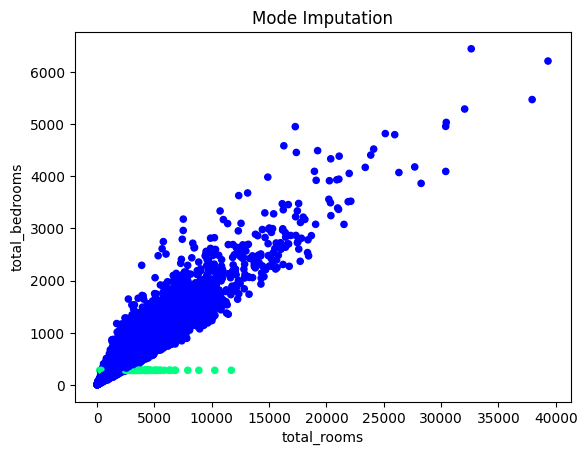

In [70]:
fig = plt.Figure()
null_values = immo_df['total_bedrooms'].isnull()
fig = df_test2.plot(x="total_rooms", y='total_bedrooms', kind='scatter', c=null_values, cmap='winter', title='Mode Imputation', colorbar=False)

####  K-Nearest Neighbour (KNN) Imputation

In [65]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn = immo_df.filter(['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'], axis=1).copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

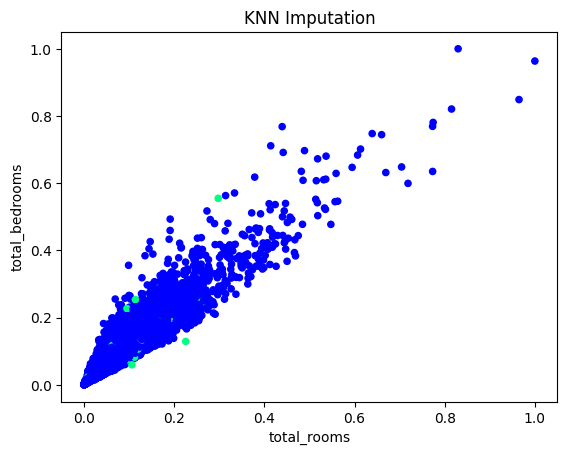

In [66]:
fig = plt.Figure()
null_values = immo_df['total_bedrooms'].isnull() 
fig = df_knn_imputed.plot(x="total_rooms", y='total_bedrooms', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)

In [79]:
df_knn_imputed

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.098039,0.046981,0.073103,0.039071,0.068257,0.067709,0.117527
1,0.137255,0.051534,0.053857,0.024076,0.055592,0.442297,0.534227
2,0.470588,0.022104,0.032904,0.026010,0.034868,0.072668,0.089280
3,0.588235,0.015669,0.035232,0.016648,0.037007,0.070930,0.381444
4,0.392157,0.048736,0.057582,0.031587,0.060855,0.247003,0.212166
...,...,...,...,...,...,...,...
16507,0.372549,0.037111,0.042837,0.020797,0.040789,0.176729,0.162476
16508,0.941176,0.060004,0.077914,0.031615,0.075000,0.145750,0.181651
16509,0.352941,0.064226,0.071240,0.033717,0.070230,0.275576,0.366186
16510,0.745098,0.070458,0.130064,0.071274,0.126809,0.143108,0.285568


#### Multivariate Imputation by Chained Equation — MICE

In [67]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = immo_df.filter(['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)


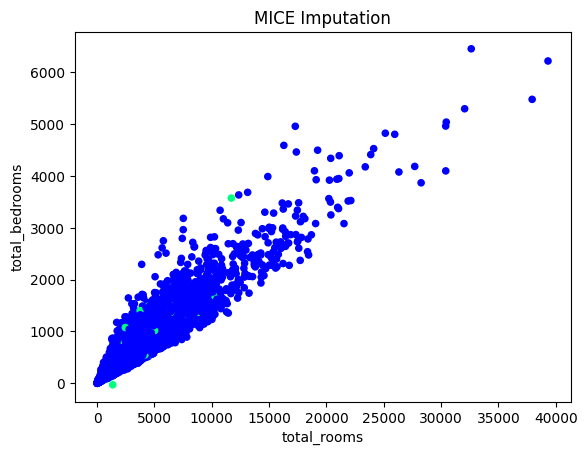

In [68]:
fig = plt.Figure()
null_values = immo_df['total_bedrooms'].isnull()
fig = df_mice_imputed.plot(x='total_rooms', y='total_bedrooms', kind='scatter', c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)

In [78]:
df_mice_imputed

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0
1,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0
2,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0
3,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0
4,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0
...,...,...,...,...,...,...,...
16507,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0
16508,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0
16509,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0
16510,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0


### Analyse des données

In [8]:
immo_df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7312
mean,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453,NaN
std,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661,NaN
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,NaN
25%,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000,NaN
50%,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000,NaN
75%,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000,NaN


<AxesSubplot:>

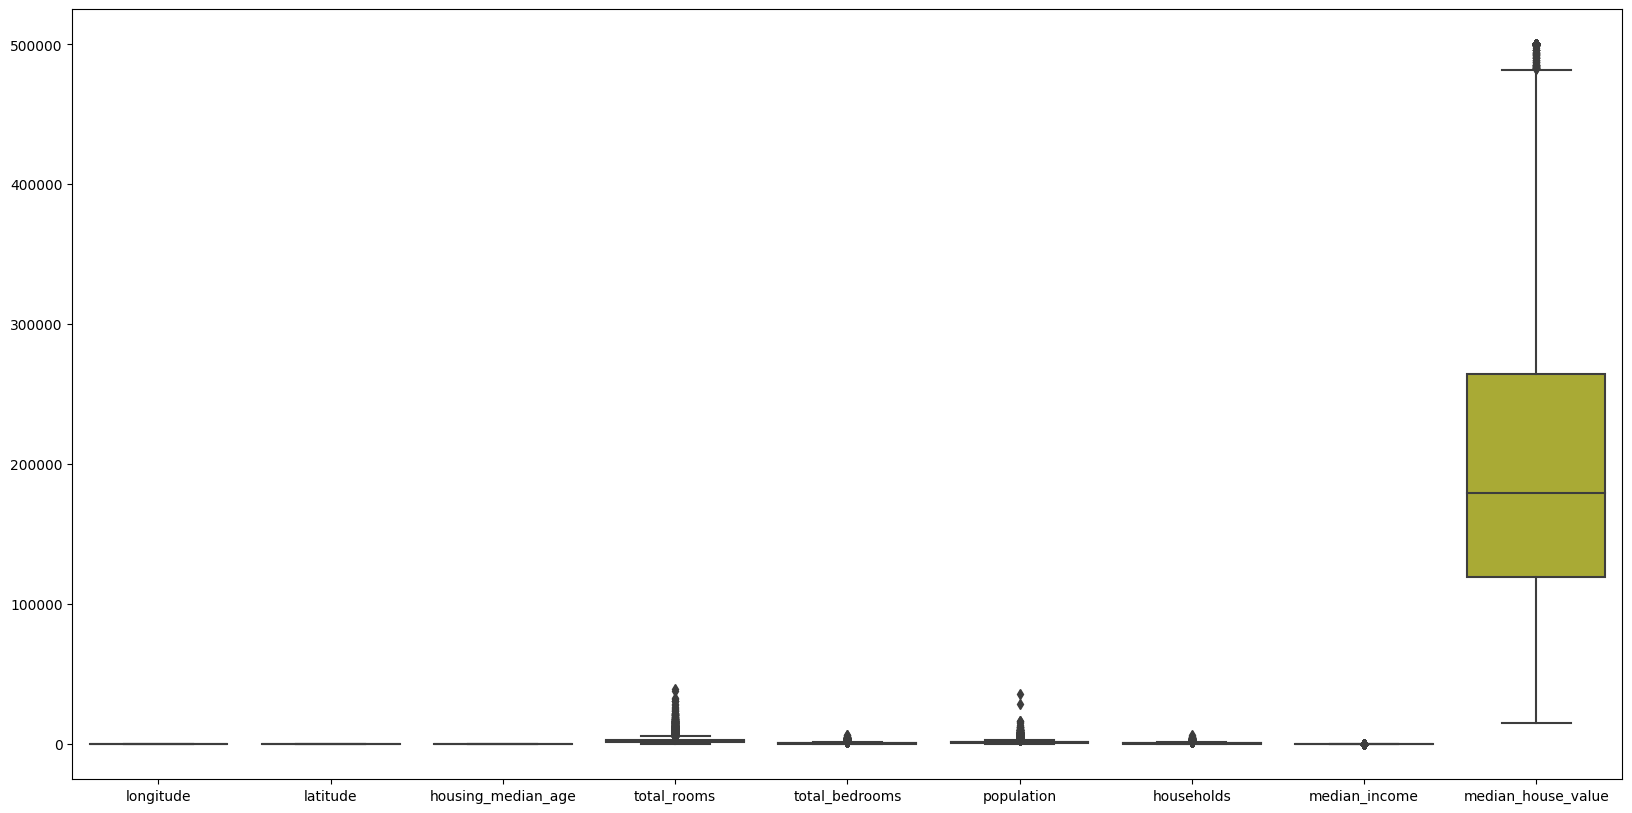

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(data=immo_df)

<AxesSubplot:ylabel='median_income'>

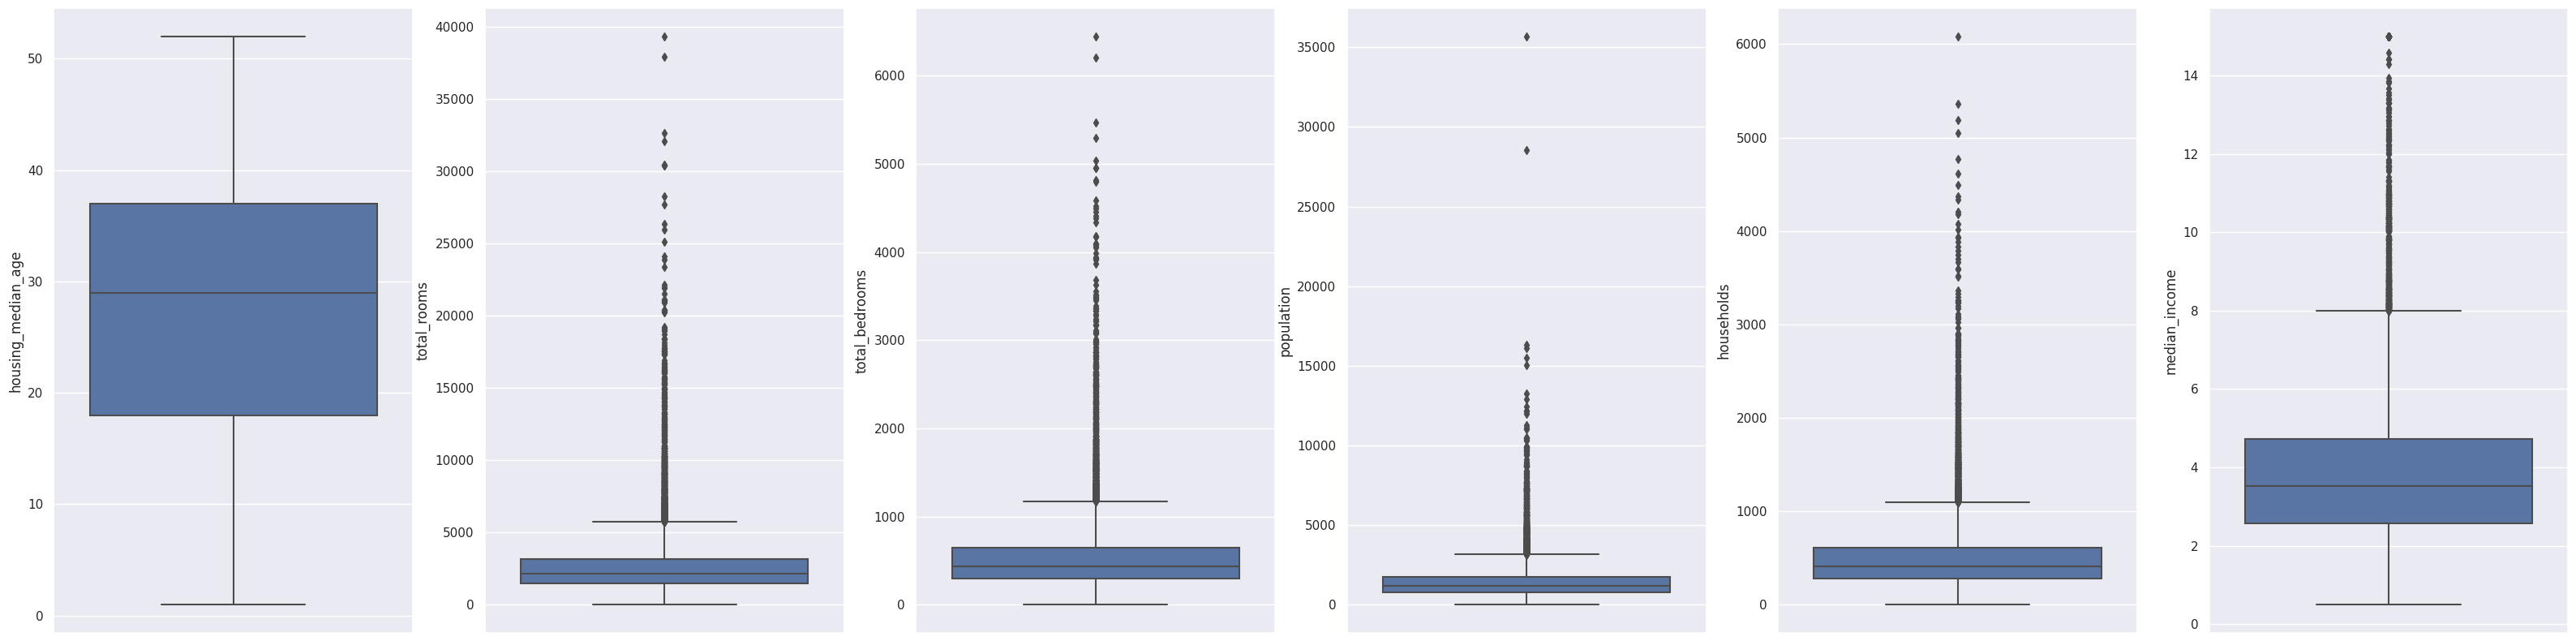

In [31]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,6)
sns.boxplot(y=immo_df["housing_median_age"], ax=ax[0])
sns.boxplot(y=immo_df["total_rooms"], ax=ax[1])
sns.boxplot(y=immo_df["total_bedrooms"], ax=ax[2])
sns.boxplot(y=immo_df["population"], ax=ax[3])
sns.boxplot(y=immo_df["households"], ax=ax[4])
sns.boxplot(y=immo_df["median_income"], ax=ax[5])

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

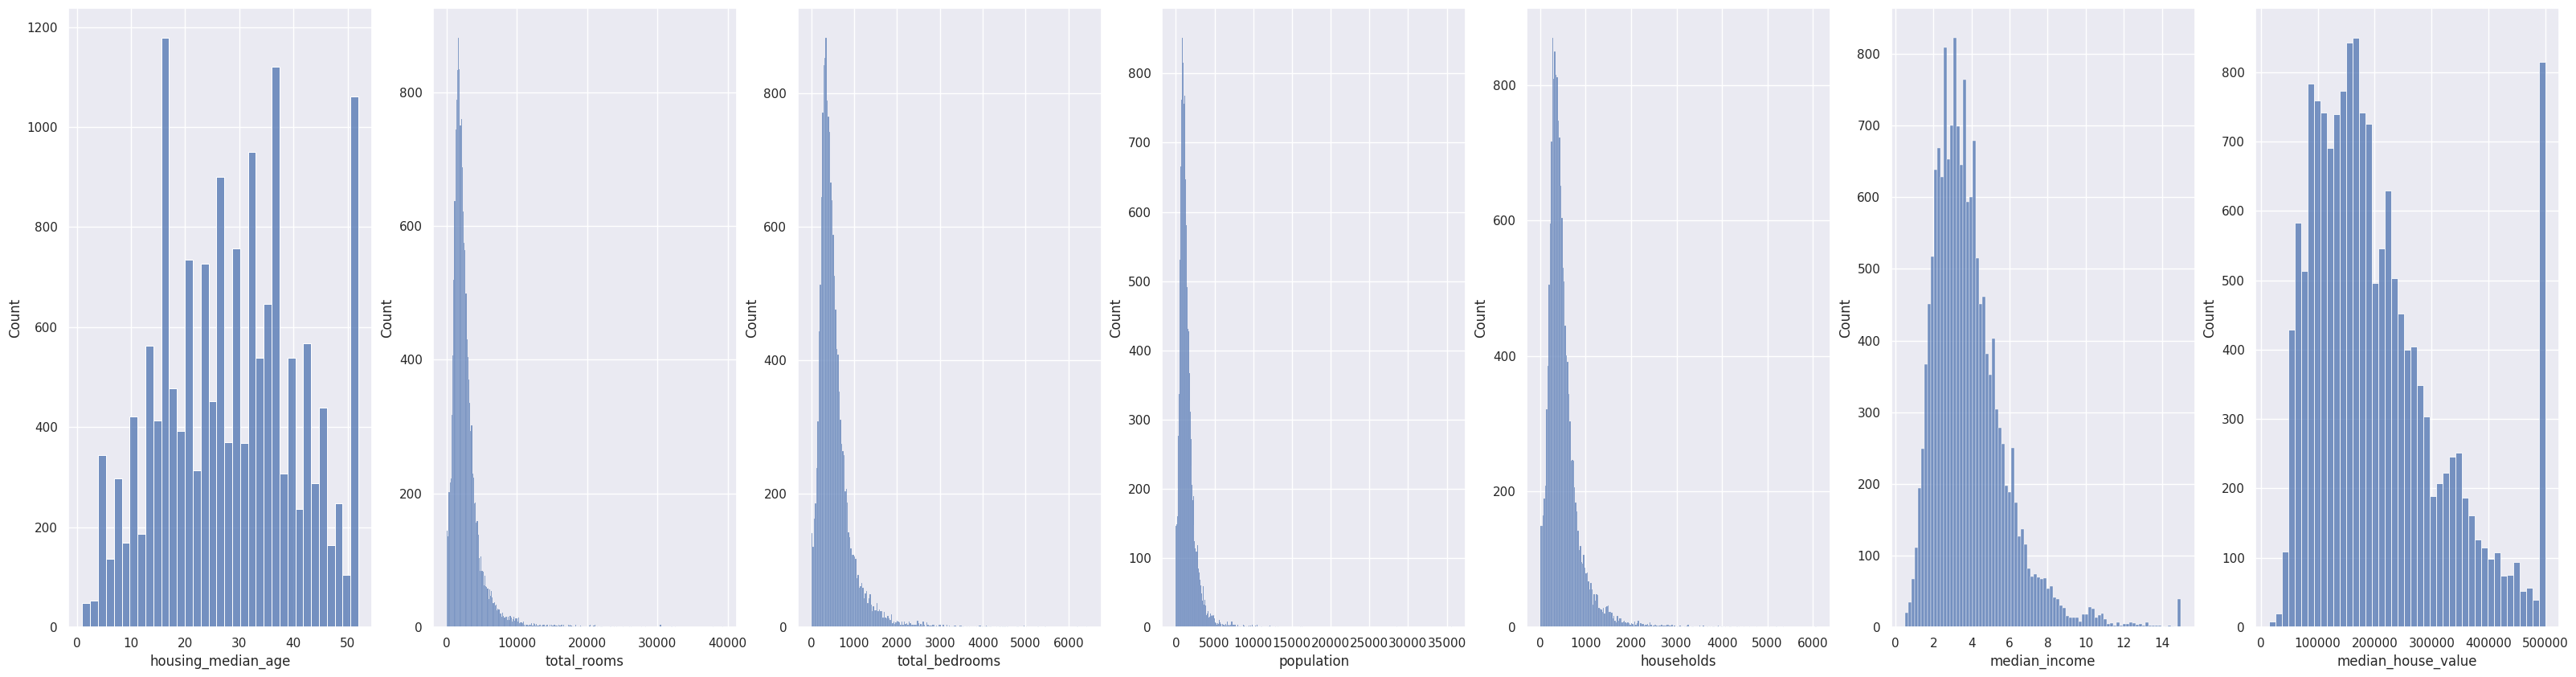

In [34]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,7)
sns.histplot(x=immo_df["housing_median_age"], ax=ax[0])
sns.histplot(x=immo_df["total_rooms"], ax=ax[1])
sns.histplot(x=immo_df["total_bedrooms"], ax=ax[2])
sns.histplot(x=immo_df["population"], ax=ax[3])
sns.histplot(x=immo_df["households"], ax=ax[4])
sns.histplot(x=immo_df["median_income"], ax=ax[5])
sns.histplot(x=immo_df["median_house_value"], ax=ax[6])

### Recherche des outliers